In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/szeged-weather/weatherHistory.csv


In [2]:
df = pd.read_csv('/kaggle/input/szeged-weather/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df['Precip Type'].fillna('Unknown', inplace = True)

In [7]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


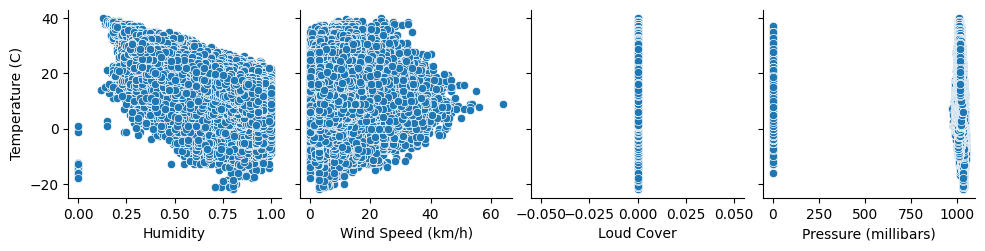

In [9]:
sns.pairplot( df, x_vars = ['Humidity','Wind Speed (km/h)','Loud Cover','Pressure (millibars)'], y_vars = ['Temperature (C)'])

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

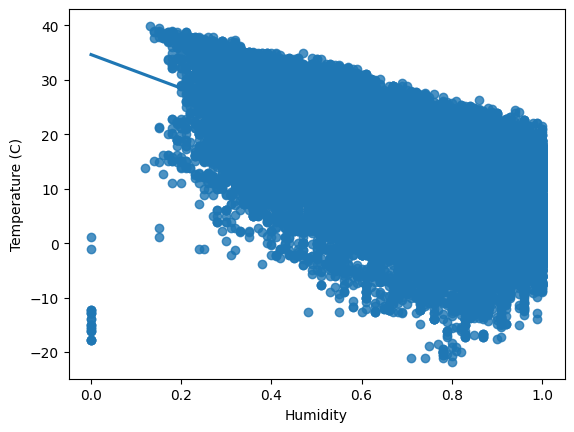

In [10]:
sns.regplot(df,x = 'Humidity', y = 'Temperature (C)')

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Summary'] = le.fit_transform(df['Summary'])
df['Precip Type'] = le.fit_transform(df['Precip Type'])

In [12]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
X = df.drop(['Formatted Date', 'Temperature (C)', 'Daily Summary'], axis = 1)
y = df['Temperature (C)']

In [14]:
X.head()

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,19,1,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,19,1,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,17,1,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,19,1,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,17,1,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [15]:
y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

In [16]:
cols = X.columns
cols

Index(['Summary', 'Precip Type', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')

In [17]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [18]:
X = pd.DataFrame(X, columns = cols)
X.head()

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0.730769,0.5,0.523486,0.89,0.221130,0.699164,0.983,0.0,0.970135
1,0.730769,0.5,0.521084,0.86,0.223399,0.721448,0.983,0.0,0.970613
2,0.653846,0.5,0.553144,0.89,0.061523,0.568245,0.929,0.0,0.970909
3,0.730769,0.5,0.501947,0.83,0.220877,0.749304,0.983,0.0,0.971358
4,0.653846,0.5,0.517356,0.83,0.172970,0.721448,0.983,0.0,0.971454


In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [20]:
print('X training set shape ', Xtrain.shape)
print('X testing set shape ', Xtest.shape)
print('y training set shape ', ytrain.shape)
print('y testing set shape ', ytest.shape)

X training set shape  (67517, 9)
X testing set shape  (28936, 9)
y training set shape  (67517,)
y testing set shape  (28936,)


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(Xtrain,ytrain)

LinearRegression()

In [23]:
lr.intercept_

-21.61337277214811

In [24]:
lr.coef_

array([ 0.20943276,  0.14323868, 58.60923912, -1.37544672,  5.14662828,
       -0.134599  ,  0.14275495,  0.        , -0.26736728])

In [25]:
y_pred = lr.predict(Xtest)
y_pred

array([28.12481451,  9.59915913, 15.17019924, ..., 19.20054547,
       12.82848935, 13.6155072 ])

In [26]:
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error ", mean_absolute_error(ytest, y_pred))
print("Mean squared error ", mean_squared_error(ytest,y_pred))
print('R squared ', r2_score(ytest,y_pred))

Mean Absolute Error  0.7398172849536235
Mean squared error  0.8938866527950491
R squared  0.9902004612085823
